# MCR-ALS with kinetic constraints

In this example, we perform the MCR ALS optimization of the UV-vis of
spectra resulting from a three-component reaction [A]{.title-ref} -\>
[B]{.title-ref} -\> [C]{.title-ref} which was investigated by UV--Vis
spectroscopy. Full details on the reaction and data acquisition
conditions can be found in @bijlsma:2001 . The data can be downloded
from the author website [Biosystems Data Analysis group University of
Amsterdam](http://www.bdagroup.nl/content/Downloads/datasets/datasets.php)
(Copyright 2005 Biosystems Data Analysis Group ; Universiteit van
Amsterdam ). For the user convenience, \# this dataset is present in the
\'datadir\' of spectrochempy in \'matlabdata/METING9.MAT\'.


In [1]:
import numpy as np

import spectrochempy as scp

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.1.20.dev1008© Copyright 2014-2025 - A.Travert & C.Fernandez @ LCS


# Loading a NDDataset

Load the data with the [read]{.title-ref} function.


In [2]:
ds = scp.read("matlabdata/METING9.MAT")

This file contains a pair of datasets. The first dataset contains the
time in seconds since the start of the reaction (t=0). The second
dataset contains the UV-VIS spectra of the reaction mixture, recorded at
different time points. The first column of the matrix contains the
wavelength axis and the remaining columns are the measured UV-VIS
spectra (wavelengths x timepoints)


In [3]:
print("\n NDDataset names: " + str([d.name for d in ds]))


 NDDataset names: ['RelTime', 'x9b']


We load the experimental spectra (in [ds\[1\]]{.title-ref}), add the
[y]{.title-ref} (time) and [x]{.title-ref} (wavelength) coordinates, and
keep one spectrum of out 4:


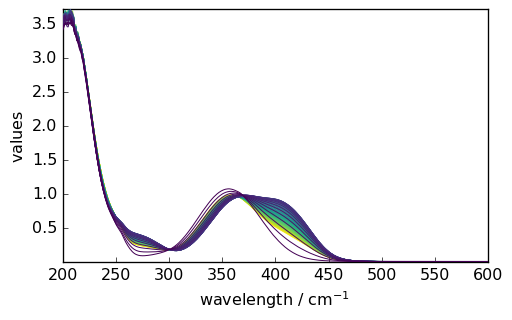

In [4]:
D = scp.NDDataset(ds[1][:, 1:].data.T)
D.y = scp.Coord(ds[0].data.squeeze(), title="time") / 60
D.x = scp.Coord(ds[1][:, 0].data.squeeze(), title="wavelength / cm$^{-1}$")
D = D[::4]
_ = D.plot()

A first estimate of the concentrations can be obtained by EFA:


compute EFA...


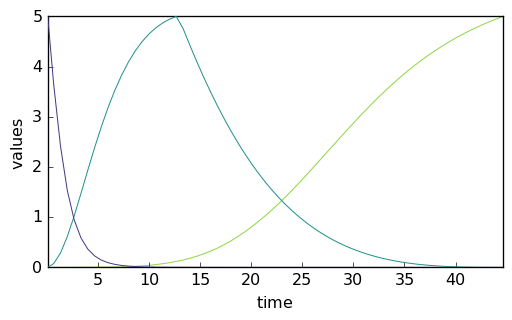

In [5]:
print("compute EFA...")
efa = scp.EFA()
efa.fit(D[:, 300.0:500.0])
efa.n_components = 3
C0 = efa.transform()
C0 = C0 / C0.max(dim="y") * 5.0
_ = C0.T.plot()

We can get a better estimate of the concentration (C) and pure spectra
profiles (St) by soft MCR-ALS:


 Concentration profile initialized with 3 components


 Initial spectra profile computed


 ***           ALS optimisation log            ***


 #iter     RSE / PCA        RSE / Exp      %change


 -------------------------------------------------


   1        0.002867        0.005886      -99.284101


   2        0.002813        0.005863       -0.390168


   3        0.002810        0.005861       -0.020846


 converged !


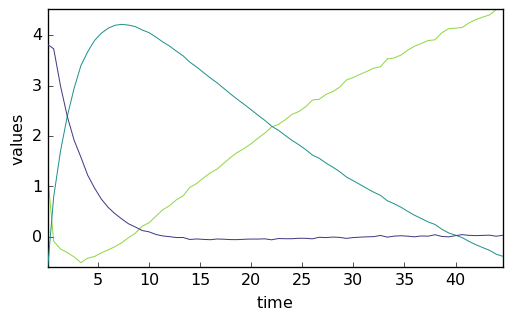

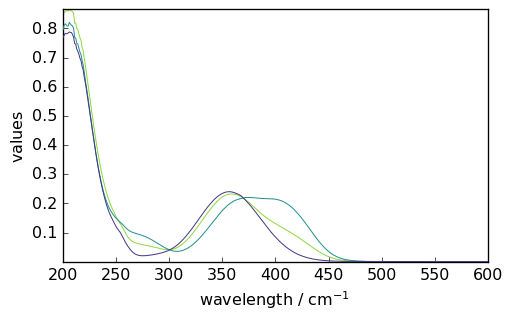

In [6]:
mcr_1 = scp.MCRALS(log_level="INFO")
_ = mcr_1.fit(D, C0)

_ = mcr_1.C.T.plot()
_ = mcr_1.St.plot()

Kinetic constraints can be added, i.e., imposing that the concentration
profiles obey a kinetic model. To do so we first define an
ActionMAssKinetics object with roughly estimated rate constants:


In [7]:
reactions = ("A -> B", "B -> C")
species_concentrations = {"A": 5.0, "B": 0.0, "C": 0.0}
k0 = np.array((0.5, 0.05))
kin = scp.ActionMassKinetics(reactions, species_concentrations, k0)

The concentration profile obtained with this approximate model can be
computed and compared with those of the soft MCR-ALS:


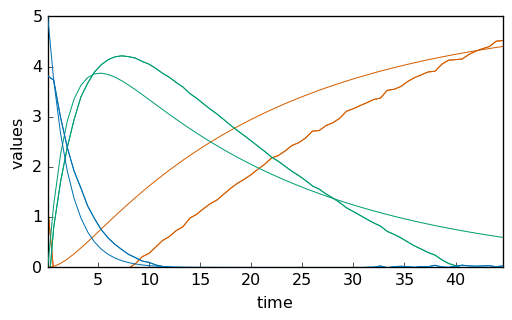

In [8]:
Ckin = kin.integrate(D.y.data)
_ = mcr_1.C.T.plot(linestyle="-", cmap=None)
_ = Ckin.T.plot(clear=False, cmap=None)

Even though very approximate, the same values can be used to run a
hard-soft MCR-ALS:


In [9]:
X = D[:, 300.0:500.0]
param_to_optimize = {"k[0]": 0.5, "k[1]": 0.05}
mcr_2 = scp.MCRALS()
mcr_2.hardConc = [0, 1, 2]
mcr_2.getConc = kin.fit_to_concentrations
mcr_2.argsGetConc = ([0, 1, 2], [0, 1, 2], param_to_optimize)
mcr_2.kwargsGetConc = {"ivp_solver_kwargs": {"return_NDDataset": False}}

mcr_2.fit(X, Ckin)

Optimization of the parameters.
         Initial parameters: [     0.5     0.05]
         Initial function value: 0.000000
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 35
         Optimization time: 0:00:00.077381
         Final parameters: [     0.5     0.05]
Optimization of the parameters.
         Initial parameters: [     0.5     0.05]
         Initial function value: 7.032662
Optimization terminated successfully.
         Current function value: 4.004007
         Iterations: 27
         Function evaluations: 54
         Optimization time: 0:00:00.107592
         Final parameters: [  0.3821  0.05042]
Optimization of the parameters.
         Initial parameters: [  0.3821  0.05042]
         Initial function value: 3.051183


Optimization terminated successfully.
         Current function value: 2.293919
         Iterations: 23
         Function evaluations: 45
         Optimization time: 0:00:00.100146
         Final parameters: [  0.3388  0.05039]
Optimization of the parameters.
         Initial parameters: [  0.3388  0.05039]
         Initial function value: 2.022835
Optimization terminated successfully.
         Current function value: 1.749865
         Iterations: 22
         Function evaluations: 43
         Optimization time: 0:00:00.080128
         Final parameters: [   0.317  0.05021]
Optimization of the parameters.
         Initial parameters: [   0.317  0.05021]
         Initial function value: 1.551980
Optimization terminated successfully.
         Current function value: 1.403400
         Iterations: 22
         Function evaluations: 43
         Optimization time: 0:00:00.078656
         Final parameters: [  0.3029  0.04998]


Now, let\'s compare the concentration profile of MCR-ALS (C =
X(C\$\_{kin}\^+\$ X)\$\^+\$) with that of the optimized kinetic model
(C\$\_{kin}\$ equiv\$ [C_constrained]{.title-ref}):


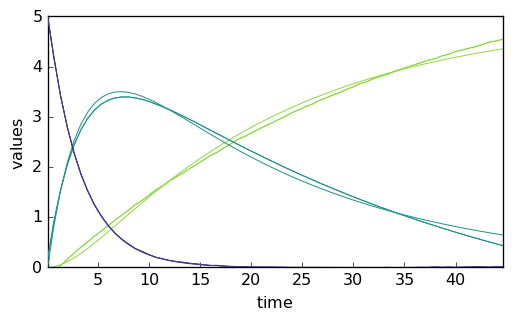

In [10]:
_ = mcr_2.C.T.plot()
_ = mcr_2.C_constrained.T.plot(clear=False)

Finally, let\'s plot some of the pure spectra profiles St, and the

:   reconstructed dataset (X_hat = C St) vs original dataset (X) and
    residuals.


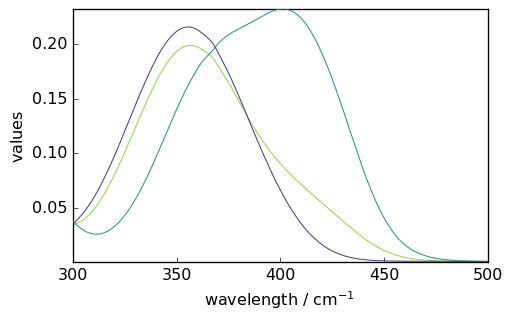

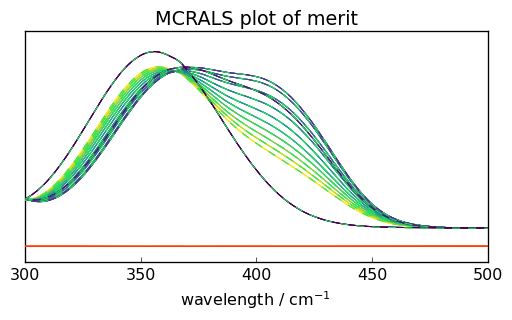

In [11]:
_ = mcr_2.St.plot()
_ = mcr_2.plotmerit(nb_traces=10)

This ends the example ! The following line can be uncommented if no plot
shows when running the .py script with python


In [12]:
# scp.show()